# **Análisis de Datos – Regresión Lineal (Ejercicio)**

**Grado en Ingeniería Informática · Universidad Carlos III de Madrid**



## Introducción de datos

En primer lugar, introduciremos los datos del enunciado.

In [1]:
notas_evau = [3.9, 4.3, 2.1, 6.4, 5.7, 4.7, 2.8, 7.5, 3.4, 5.2]
notas_grado = [6.5, 7.8, 5.2, 8.2, 2.5, 8.9, 7.3, 9.8, 5.6, 7.5]

## Aprendizaje del modelo de regresión lineal

Para esta tarea, vamos a emplear *scikit-learn*. Por comodidad, hemos decidido renombrar las variables con los datos a la notación habitual (*X, y*).

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(notas_evau).reshape(-1, 1)
y = np.array(notas_grado)

lr = LinearRegression()
lr.fit(X, y)

b0 = lr.intercept_
b1 = lr.coef_[0]
print(f"Coeficientes de la regresión lineal: B0 = {b0:.2f}, B1 = {b1:.2f}")

Coeficientes de la regresión lineal: B0 = 4.78, B1 = 0.47


## Representación gráfica del modelo de regresión lineal

En esta ocasión emplearemos Matplotlib, dibujando la nube de puntos y, sobre ella, la recta de regresión.

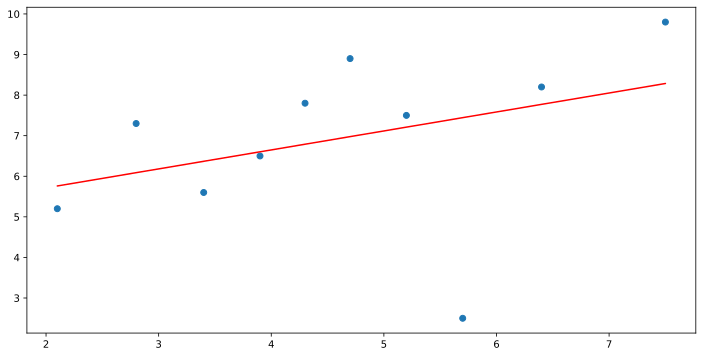

In [3]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

plt.scatter(X, y)
plt.plot(X, b0 + b1*X, 'r')
plt.show()

## Evaluación del modelo de regresión lineal

En primer lugar, calcularemos las notas estimadas por el modelo y las compararemos con las originales. Además, computaremos el error en cada observación. 

In [4]:
y_pred = lr.predict(X)
e = y - y_pred

print(f"Las notas reales en el grado son:\n{y}")
print(f"Las notas estimadas por el modelo son:\n{y_pred}")
print(f"Los errores en la estimación son:\n{e}")

Las notas reales en el grado son:
[6.5 7.8 5.2 8.2 2.5 8.9 7.3 9.8 5.6 7.5]
Las notas estimadas por el modelo son:
[6.60263541 6.78970089 5.76084074 7.77179466 7.44443007 6.97676637
 6.08820534 8.28622474 6.36880356 7.21059822]
Los errores en la estimación son:
[-0.10263541  1.01029911 -0.56084074  0.42820534 -4.94443007  1.92323363
  1.21179466  1.51377526 -0.76880356  0.28940178]


A continuación, calcularemos algunas métricas de relevancia:

In [5]:
rmse = np.sqrt(np.mean(e**2))
mae = np.mean(np.abs(e))
r2 = lr.score(X, y)

print(f"RMSE = {rmse:.2f} (puntos)")
print(f"MAE = {mae:.2f} (puntos)")
print(f"R2 = {r2:.2f}")

RMSE = 1.85 (puntos)
MAE = 1.28 (puntos)
R2 = 0.14


Observamos que el coeficiente de determinación es positivo, aunque bajo. El ajuste es claramente mejorable, pues como observamos en la gráfica anterior, hay un valor anómalo (el/la estudiante que obtiene un 2,5 en el grado habiendo tenido un 5,7 en selectividad) que desplaza la recta hacia abajo. 

**Ejercicio adicional:** ¿qué ocurre si eliminamos esa observación atípica?

## Validación del modelo mediante contraste de hipótesis

Como ya hemos hecho anteriormente, realizaremos una prueba para contrastar las siguientes hipótesis:

*   H0: la regresión NO es significativa (B1 = 0)
*   H1: la regresión SÍ es significativa (B1 ≠ 0)



In [6]:
import statsmodels.api as sm

lr = sm.OLS(y, X).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              71.63
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                    1.41e-05
Time:                        17:52:55   Log-Likelihood:                         -22.980
No. Observations:                  10   AIC:                                      47.96
Df Residuals:                       9   BIC:                                      48.26
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/pheithar/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


El *p*-valor es suficientemente bajo (muy próximo a 0), permitiéndonos rechazar la hipótesis nula y por tanto considerar que la regresión sí es significativa, incluso si el ajuste es mejorable.